In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

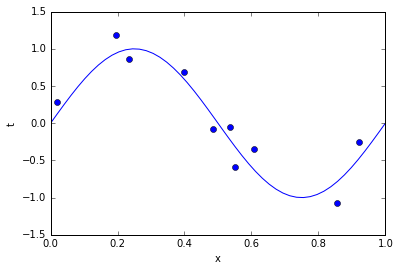

In [95]:
_ = np.linspace(0, 1)
plt.plot(_, np.sin(2. * np.pi * _))
x, t = np.loadtxt('RegressionData.txt', unpack=True)
plt.plot(x, t, 'bo')
plt.xlabel('x')
plt.ylabel('t')

In [74]:
# Initialize weights and biases.
b1 = np.random.rand(3, 1) - 0.5
b2 = np.random.rand(1, 1) - 0.5
W1 = np.random.rand(3, 1) - 0.5
W2 = np.random.rand(1, 3) - 0.5

In [75]:
W2

array([[ 0.32108026, -0.46934701,  0.15158772]])

In [76]:
a0 = x[0]
y_true = t[0]

z1 = np.dot(W1, a0) + b1
a1 = np.tanh(z1)
z2 = np.dot(W2, a1) + b2
a2 = z2  # linear
a2, y_true

(array([[ 0.43162783]]), -0.58940000000000003)

In [77]:
cost = np.mean((a2 - y_true)**2)
cost

1.0424978388583561

In [78]:
delta2 = 2. * a2 * 1.  # gradient of C wrt a2 * derivative of lin at z2
delta1 = np.dot(W2.T, delta2) * (1. - np.tanh(z1)**2)  # (W2^T dot delta2) * derivative of tanh at z1

In [79]:
dW2 = np.dot(delta2, a1.T)
dW1 = np.dot(delta1, a0.T)

In [82]:
dW1

array([[ 0.11969639],
       [-0.19486064],
       [ 0.06989259]])

In [80]:
learning_rate = 0.5
W1 -= learning_rate * dW1
W2 -= learning_rate * dW2

In [33]:
learning_rate = 0.005
cost_history = []

for epoch in range(5000):

    # List of gradients for each epoch.
    dW2 = []
    dW1 = []
    
    cost_epoch = []

    for a0, y_true in zip(x, t):

        # Forward pass (zx are summed inputs plus bias for layer x; a are outputs of layer x).
        z1 = np.dot(W1, a0) + b1
        a1 = np.tanh(z1)  # tanh layer
        z2 = np.dot(W2, a1) + b2
        a2 = z2  # linear layer

        cost = np.mean((a2 - y_true)**2)
        cost_epoch.append(cost)

        # Local errors.
        delta2 = 2. * a2 * 1.  # gradient of C wrt a2 * derivative of lin at z2
        delta1 = np.dot(W2.T, delta2) * (1. - np.tanh(z1)**2)  # (W2^T dot delta2) * derivative of tanh at z1

        # Gradients dC/dW.
        dW2.append(np.dot(delta2, a1.T))
        dW1.append(np.dot(delta1, a0.T))

    # Update step.
    #print W1.shape, (learning_rate * np.mean(dW1, axis=0)).shape
    W1 -= learning_rate * np.mean(dW1, axis=0)
    W2 -= learning_rate * np.mean(dW2, axis=0)
    cost_history.append(np.mean(cost_epoch))

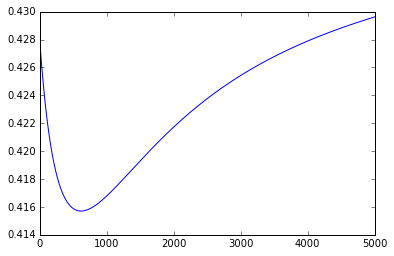

In [34]:
plt.plot(cost_history)

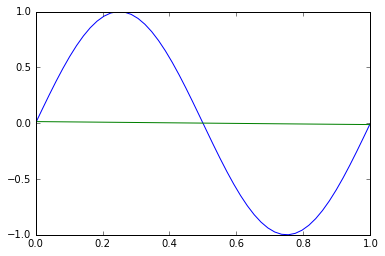

In [35]:
_ = np.linspace(0, 1)
plt.plot(_, np.sin(2. * np.pi * _))

# Forward pass (zx are summed inputs with bias for layer x, a are outputs of layer x).
y = []
for a0 in _:
    z1 = np.dot(W1, a0) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = z2  # linear
    y.append(a2[0][0])
plt.plot(_, y)

### Implementation of the same network in keras

In [162]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
        Dense(3, input_dim=1, activation='tanh'),
        Dense(1, activation='linear')
    ])

In [163]:
from keras.optimizers import SGD
model.compile(SGD(0.5), 'mse')

In [164]:
hist = model.fit(x, t, shuffle=False, batch_size=10, nb_epoch=300)

Epoch 1/300
10/10 [==============================] - 0s - loss: 0.5041
Epoch 2/300
10/10 [==============================] - 0s - loss: 0.4584
Epoch 3/300
10/10 [==============================] - 0s - loss: 0.4213
Epoch 4/300
10/10 [==============================] - 0s - loss: 0.3894
Epoch 5/300
10/10 [==============================] - 0s - loss: 0.3621
Epoch 6/300
10/10 [==============================] - 0s - loss: 0.3373
Epoch 7/300
10/10 [==============================] - 0s - loss: 0.3187
Epoch 8/300
10/10 [==============================] - 0s - loss: 0.3046
Epoch 9/300
10/10 [==============================] - 0s - loss: 0.3048
Epoch 10/300
10/10 [==============================] - 0s - loss: 0.3179
Epoch 11/300
10/10 [==============================] - 0s - loss: 0.3690
Epoch 12/300
10/10 [==============================] - 0s - loss: 0.4390
Epoch 13/300
10/10 [==============================] - 0s - loss: 0.5521
Epoch 14/300
10/10 [==============================] - 0s - loss: 0.5289
E

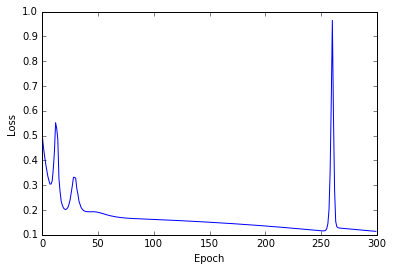

In [165]:
plt.plot(hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [158]:
import keras.backend as K
def get_activations(model, layer, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()], model.layers[layer].output)
    activations = get_activations([X_batch,0])
    return activations

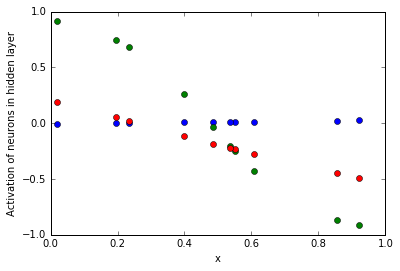

In [159]:
activations_1 = get_activations(model, 0, x.reshape(-1, 1))
plt.plot(x, activations_1, 'o')
plt.xlabel('x')
plt.ylabel('Activation of neurons in hidden layer')

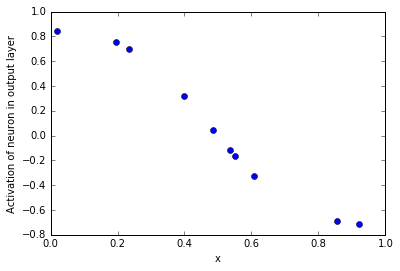

In [160]:
activations_2 = get_activations(model, 1, x.reshape(-1, 1))
plt.plot(x, activations_2, 'o')
plt.xlabel('x')
plt.ylabel('Activation of neuron in output layer')

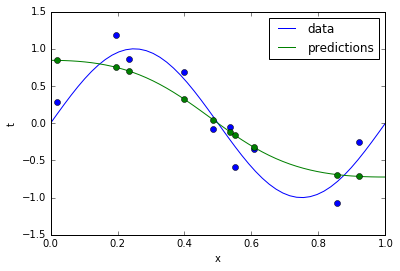

In [161]:
_ = np.linspace(0, 1)
plt.plot(_, np.sin(2. * np.pi * _), label='data')
plt.plot(x, t, 'bo')

plt.plot(_, model.predict(_), label='predictions')
plt.plot(x, model.predict(x), 'go')

plt.xlabel('x')
plt.ylabel('t')
plt.legend()